In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.2.0'

In [3]:
!pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [4]:
import numpy as np

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


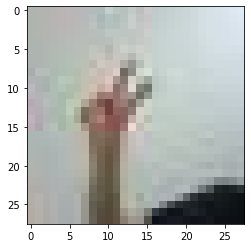

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
from tensorflow.keras import layers
model = keras.models.Sequential()
model.add(layers.Conv2D(16,(3,3),activation='relu', input_shape=(28,28,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
#  Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]
print(len(model.layers))
model.summary()

7
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        9280      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_3 (Dense)              (None, 3)              

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(x_train_norm,y_train,epochs=20)

Epoch 1/20
10/10 [==============================] - 0s 16ms/step - loss: 1.0974 - accuracy: 0.3200
Epoch 2/20
10/10 [==============================] - 0s 15ms/step - loss: 1.0567 - accuracy: 0.6000
Epoch 3/20
10/10 [==============================] - 0s 14ms/step - loss: 0.9829 - accuracy: 0.8367
Epoch 4/20
10/10 [==============================] - 0s 16ms/step - loss: 0.8855 - accuracy: 0.6733
Epoch 5/20
10/10 [==============================] - 0s 13ms/step - loss: 0.7384 - accuracy: 0.8433
Epoch 6/20
10/10 [==============================] - 0s 15ms/step - loss: 0.6028 - accuracy: 0.8600
Epoch 7/20
10/10 [==============================] - 0s 15ms/step - loss: 0.4173 - accuracy: 0.9867
Epoch 8/20
10/10 [==============================] - 0s 16ms/step - loss: 0.3036 - accuracy: 0.9867
Epoch 9/20
10/10 [==============================] - 0s 16ms/step - loss: 0.1912 - accuracy: 1.0000
Epoch 10/20
10/10 [==============================] - 0s 15ms/step - loss: 0.1068 - accuracy: 1.0000
Epoch 11/

In [9]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/for_test_rsp"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [11]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 2.5467 - accuracy: 0.4300
test_loss: 2.546717643737793 
test_accuracy: 0.4300000071525574
